## Get the Data

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>


## Data Exploration


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'],header=0)


In [10]:
df.shape

(1991, 3)

In [43]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [42]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [44]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [47]:
df.groupby('TAG')['POSTS'].sum()

TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64

In [49]:
df.groupby('TAG')['DATE'].count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64

## Data Cleaning


In [57]:
type(df.DATE[1])

str

In [60]:
df.DATE = pd.to_datetime(df.DATE)
df.head()


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation


In [63]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [69]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [70]:
reshaped_df.shape # (145,14)

(145, 14)

In [71]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [72]:
reshaped_df.isna().sum()

TAG
assembly       1
c              1
c#             0
c++            1
delphi         1
go            16
java           1
javascript     1
perl           1
php            1
python         1
r              3
ruby           1
swift         10
dtype: int64

In [76]:
reshaped_df.coun()  # The count will omit the NaN values

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [77]:
reshaped_df.fillna(0,inplace=True)

In [78]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [83]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib



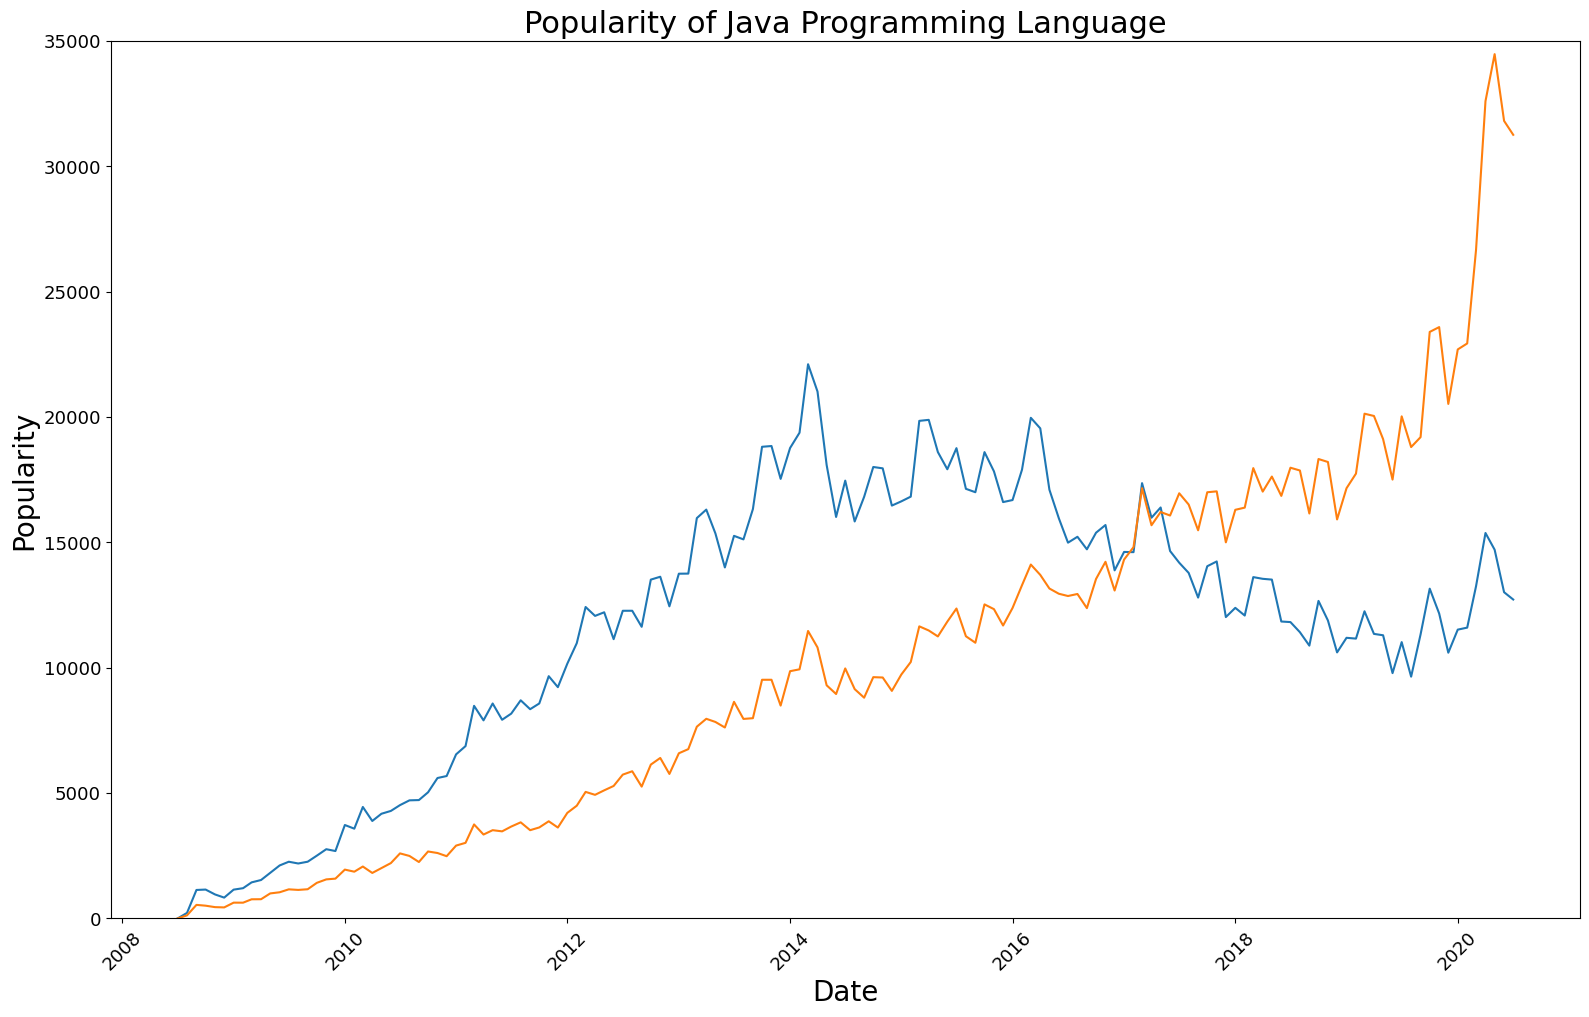

In [113]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.plot(reshaped_df.index,reshaped_df.java)
plt.plot(reshaped_df.index,reshaped_df.python)


plt.title('Popularity of Java Programming Language',fontsize=22)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.ylim(0,35000)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

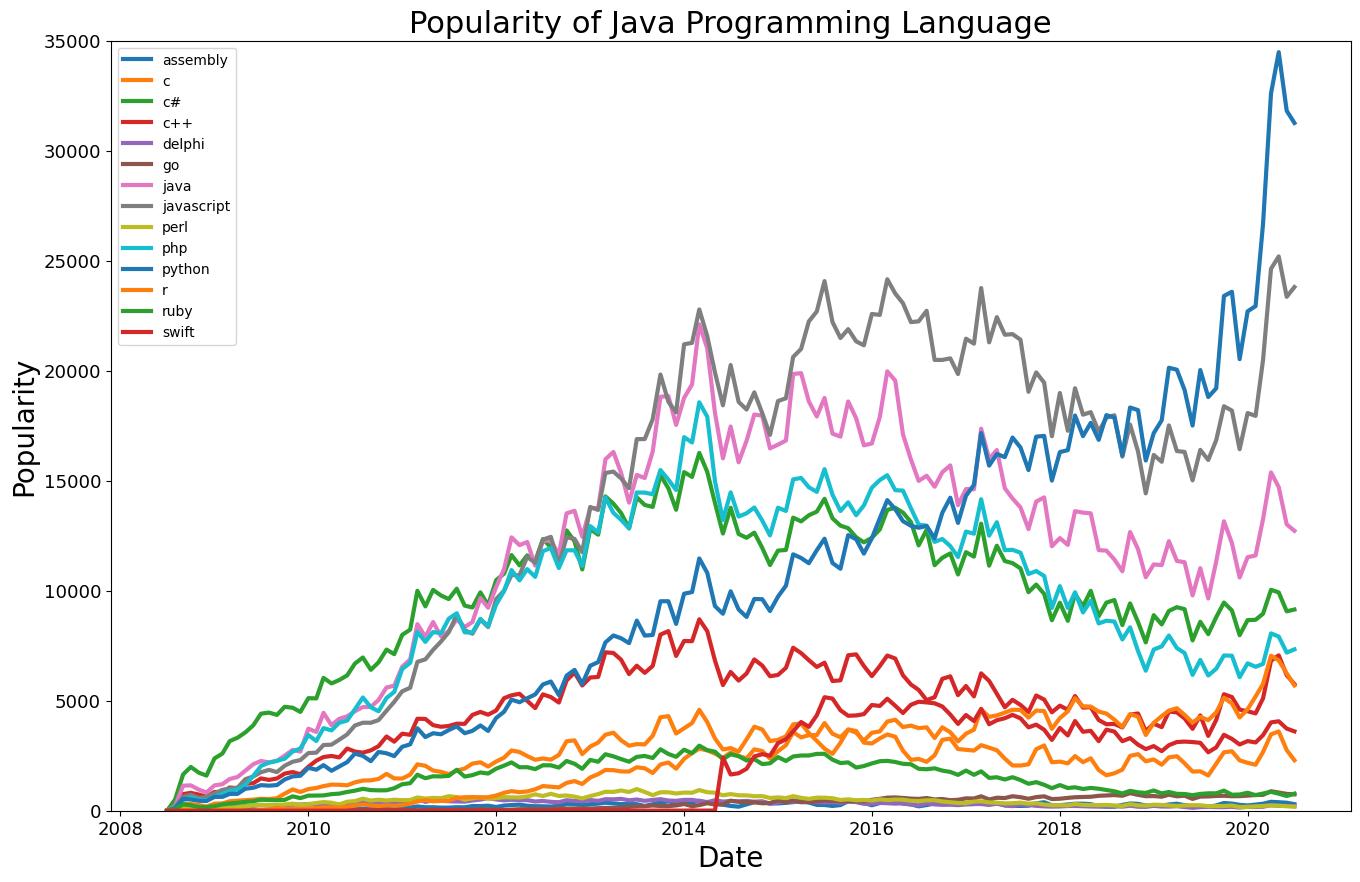

In [119]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],linewidth=3,label=reshaped_df[column].name)

plt.title('Popularity of Java Programming Language',fontsize=22)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.ylim(0,35000)
plt.legend()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [140]:
rolling_df = reshaped_df.rolling(window=12).mean()

(0.0, 35000.0)

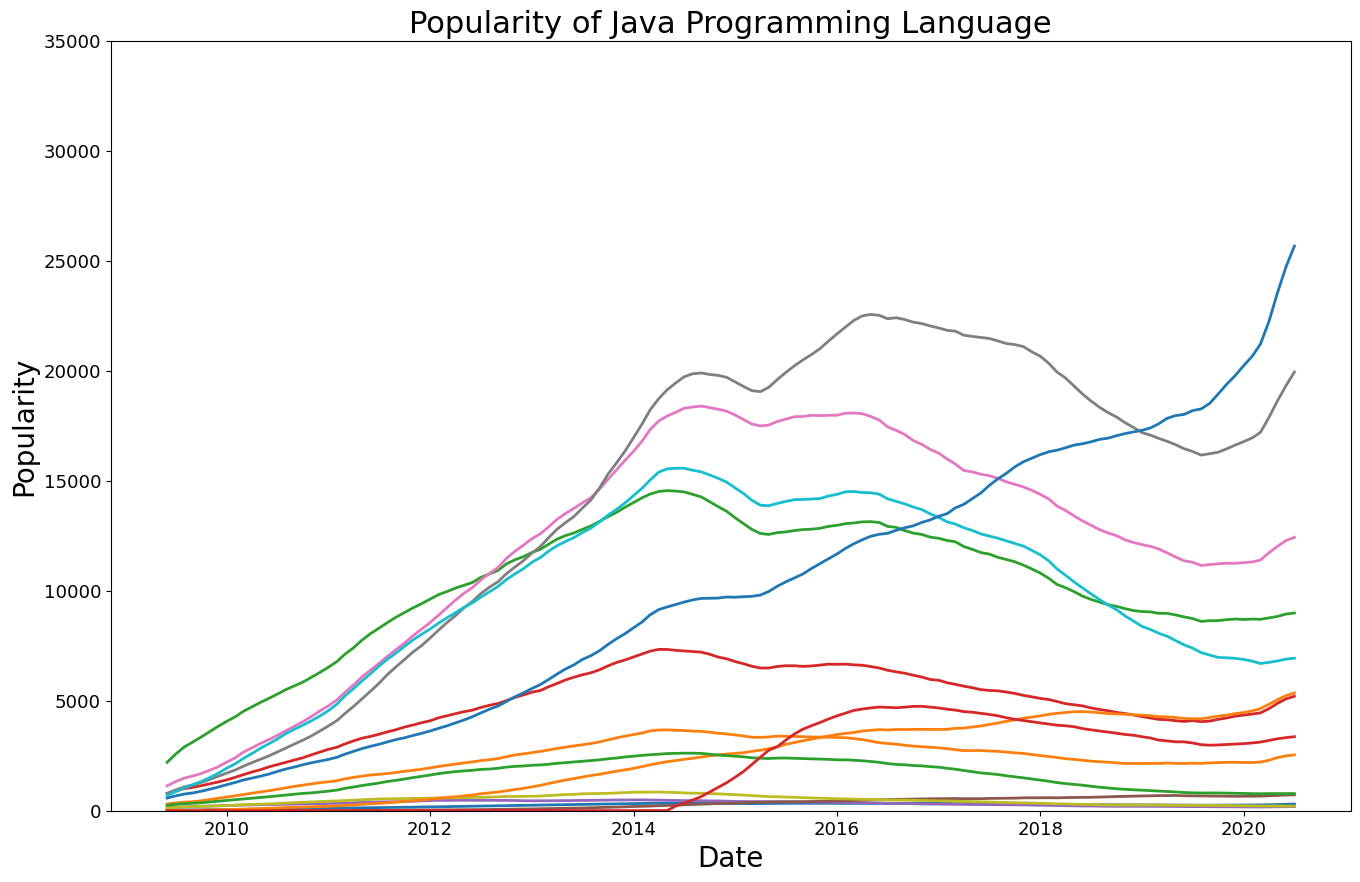

In [141]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for column in rolling_df:
    plt.plot(rolling_df.index,rolling_df[column],linewidth=2,label=rolling_df[column].name)
plt.title('Popularity of Java Programming Language',fontsize=22)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.ylim(0,35000)